# Survival analysis

## Estimating the survival function using Kaplan-Meier curve

- Tutorial from [lifelines](https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html#estimating-the-survival-function-using-kaplan-meier) library



In [14]:
import pandas
from lifelines.datasets import load_dd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


Set up:
- birth: start of the individual's tenure
- death: end of their tenure
- Censor: end of this data set (2008) or die while thier tenure

In [4]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [5]:
T = data["duration"]
E = data["observed"] # takes 1 if their death is observed

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

Text(0.5, 1.0, 'Survival function of political regimes')

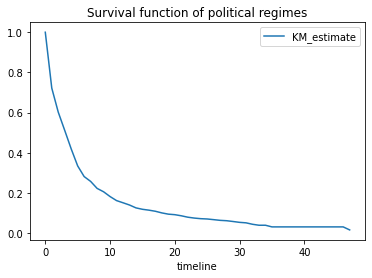

In [7]:
# plot for survival function
kmf.survival_function_.plot()
plt.title('Survival function of political regimes')

<AxesSubplot:xlabel='timeline'>

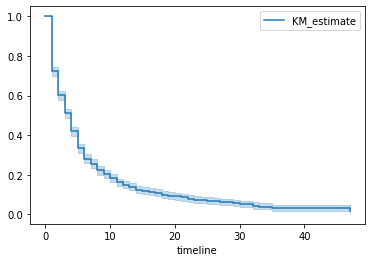

In [9]:
# with confidence interval
kmf.plot_survival_function()

In [11]:
data["democracy"].unique()

array(['Non-democracy', 'Democracy'], dtype=object)

Text(0.5, 1.0, 'Lifespans of different global regimes')

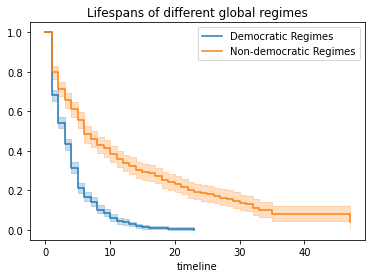

In [13]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")

kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes")

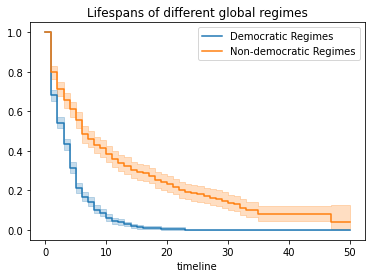

In [15]:
# we can adjust the timeline as follows
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes");

In [16]:
regime_types = data['regime'].unique()
enumerate(regime_types)

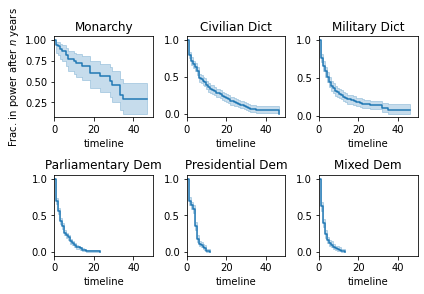

In [17]:
# when we have multiple groups:
regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()